In [ ]:
!pip install pyspark
!pip install pandas
!pip install seaborn
!pip install elephas

You should consider upgrading via the '/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, when, mean


In [ ]:
spark = SparkSession.builder \
    .appName("Telecom Churn Analysis App") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/29 17:55:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 52956)
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/socketserver.py", line 720, in __init__
    self.handle()
  File "/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/lib/python3.9/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  F

In [ ]:
data_path = "telecom_churn.csv"
telecom_df = spark.read.csv(data_path, header=True, inferSchema=True)

telecom_df.show(5)
telecom_df.printSchema()


+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [ ]:
#removing customerId column
telecom_df=telecom_df.drop("customerID")

+------+-----+
|gender|count|
+------+-----+
|  Male| 3555|
|Female| 3488|
+------+-----+



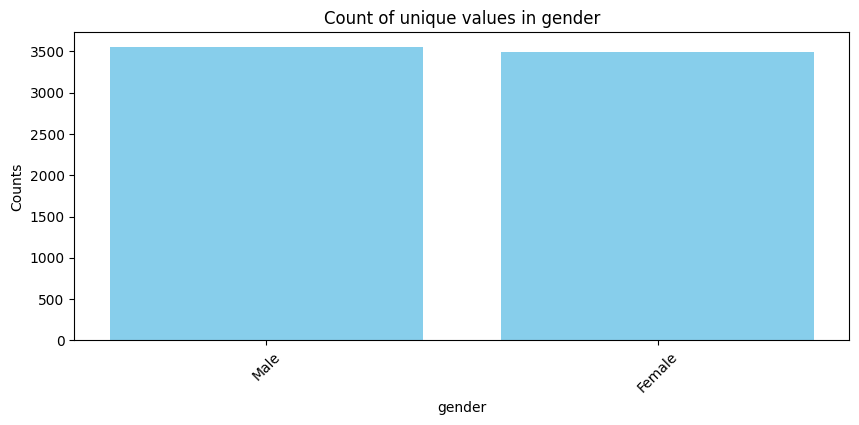

+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|            0| 5901|
|            1| 1142|
+-------------+-----+



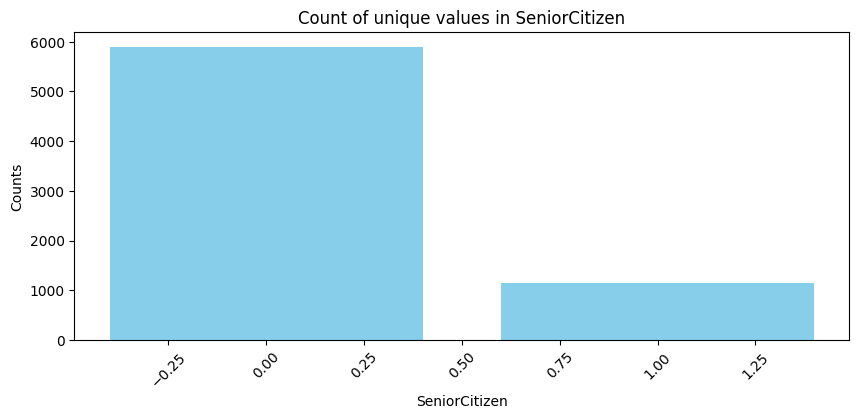

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+



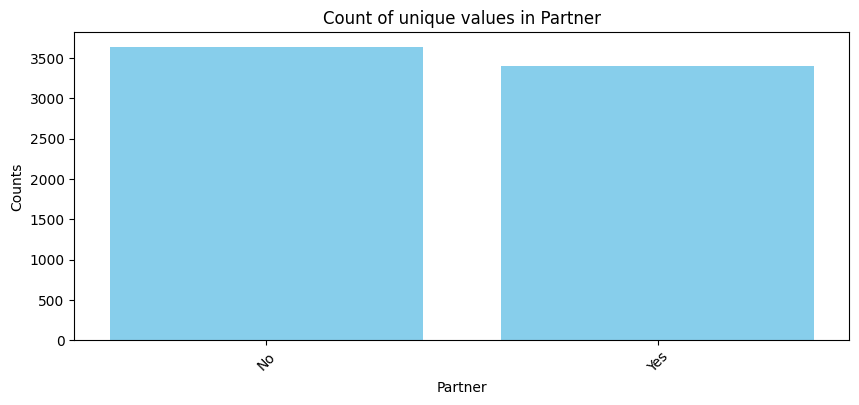

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+



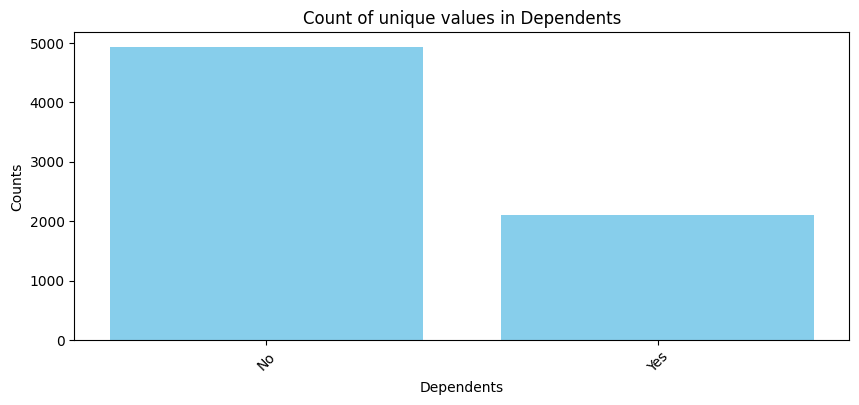

+------+-----+
|tenure|count|
+------+-----+
|     1|  613|
|    72|  362|
|     2|  238|
|     3|  200|
|     4|  176|
|    71|  170|
|     5|  133|
|     7|  131|
|     8|  123|
|     9|  119|
+------+-----+



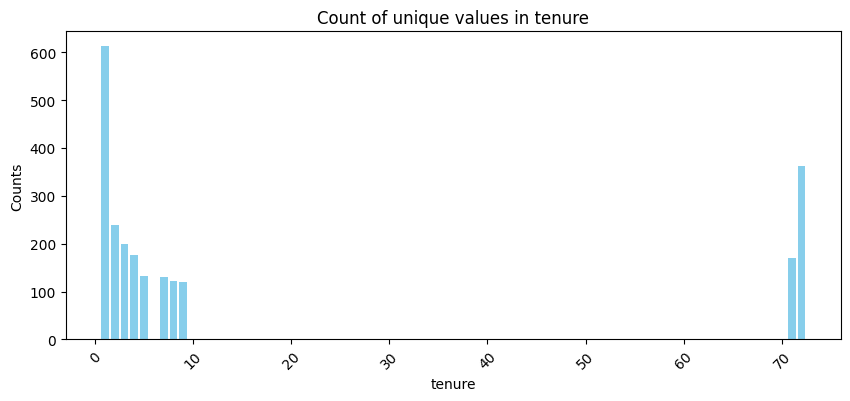

+------------+-----+
|PhoneService|count|
+------------+-----+
|         Yes| 6361|
|          No|  682|
+------------+-----+



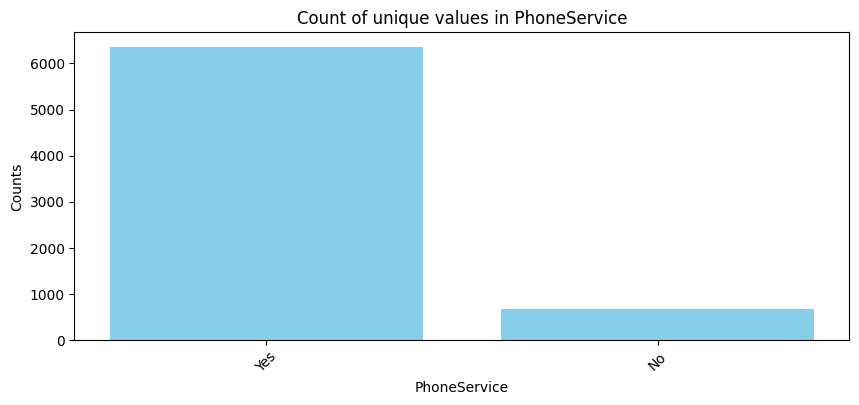

+----------------+-----+
|   MultipleLines|count|
+----------------+-----+
|              No| 3390|
|             Yes| 2971|
|No phone service|  682|
+----------------+-----+



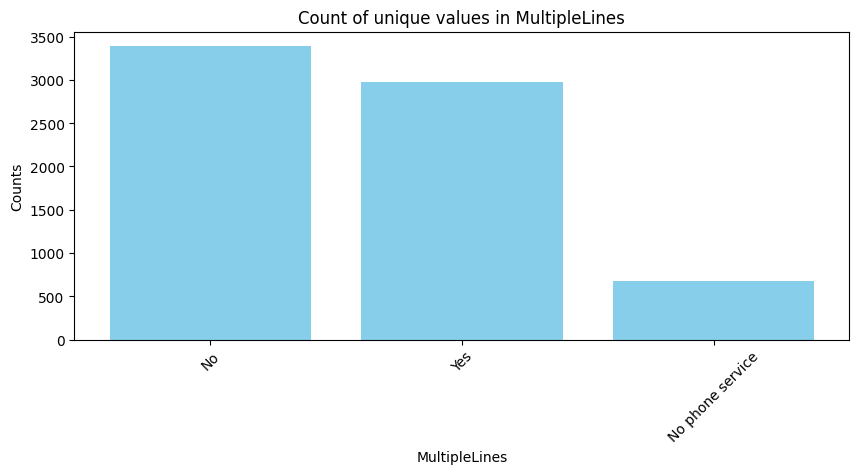

+---------------+-----+
|InternetService|count|
+---------------+-----+
|    Fiber optic| 3096|
|            DSL| 2421|
|             No| 1526|
+---------------+-----+



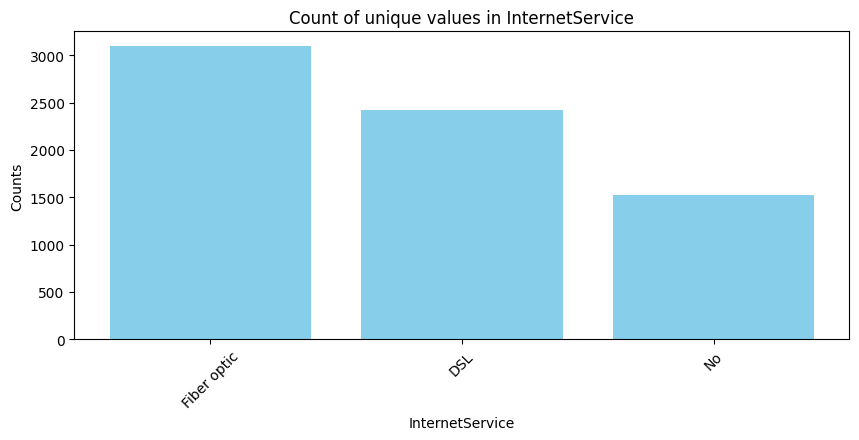

+-------------------+-----+
|     OnlineSecurity|count|
+-------------------+-----+
|                 No| 3498|
|                Yes| 2019|
|No internet service| 1526|
+-------------------+-----+



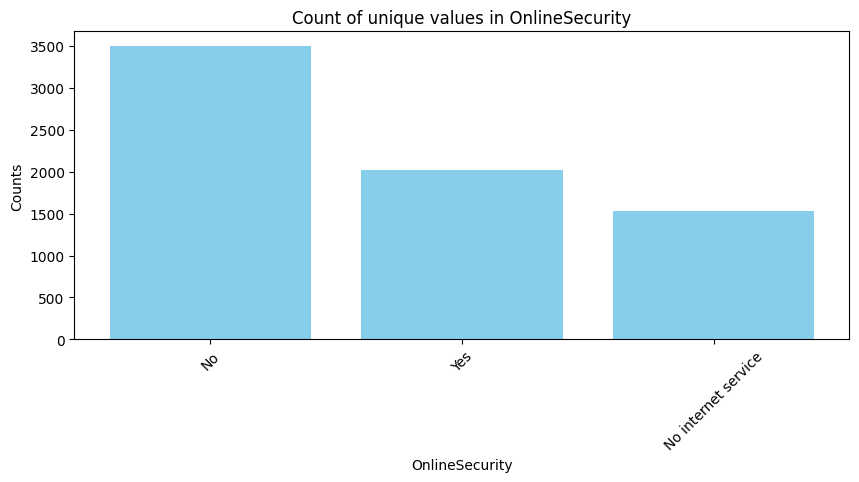

+-------------------+-----+
|       OnlineBackup|count|
+-------------------+-----+
|                 No| 3088|
|                Yes| 2429|
|No internet service| 1526|
+-------------------+-----+



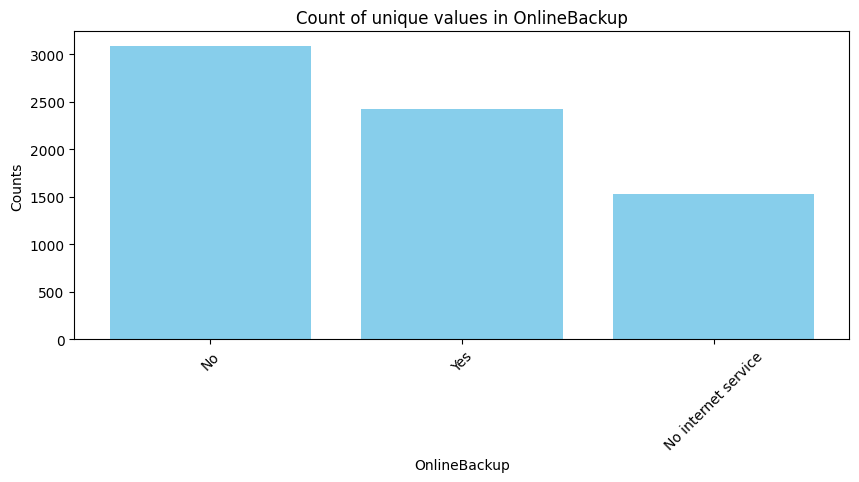

+-------------------+-----+
|   DeviceProtection|count|
+-------------------+-----+
|                 No| 3095|
|                Yes| 2422|
|No internet service| 1526|
+-------------------+-----+



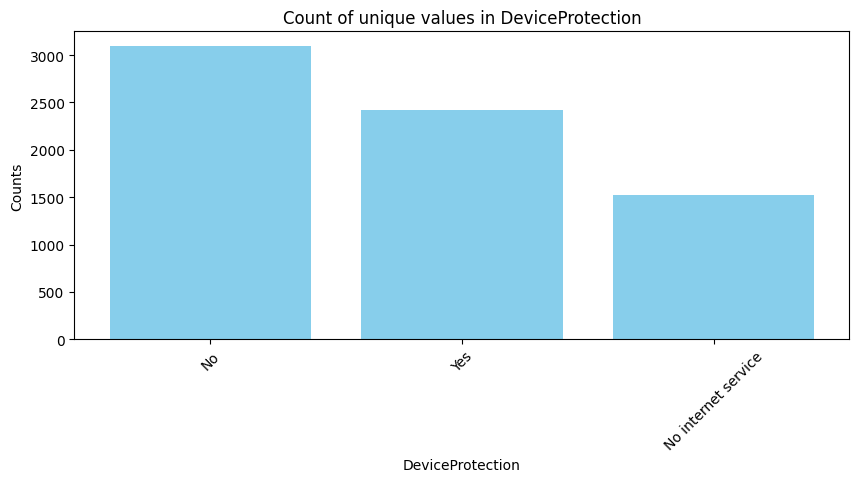

+-------------------+-----+
|        TechSupport|count|
+-------------------+-----+
|                 No| 3473|
|                Yes| 2044|
|No internet service| 1526|
+-------------------+-----+



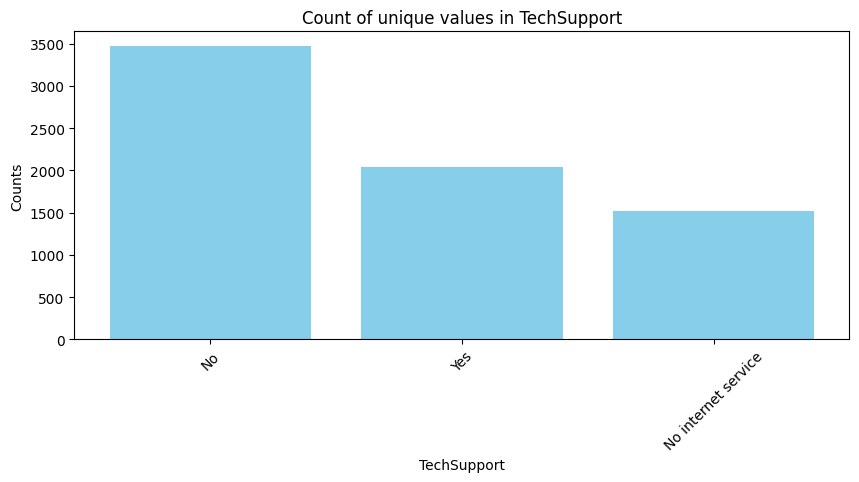

+-------------------+-----+
|        StreamingTV|count|
+-------------------+-----+
|                 No| 2810|
|                Yes| 2707|
|No internet service| 1526|
+-------------------+-----+



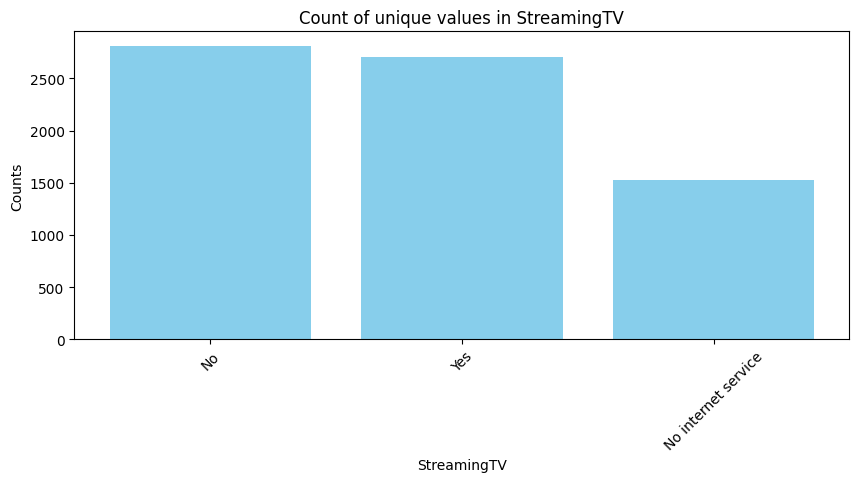

+-------------------+-----+
|    StreamingMovies|count|
+-------------------+-----+
|                 No| 2785|
|                Yes| 2732|
|No internet service| 1526|
+-------------------+-----+



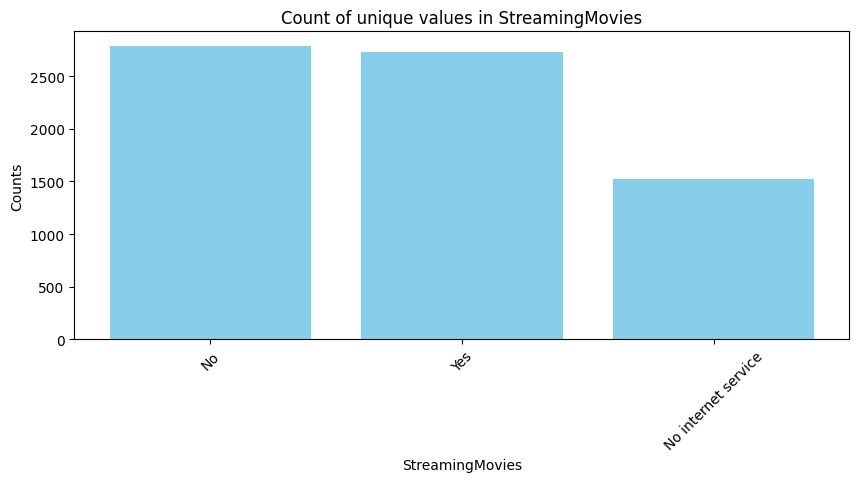

+--------------+-----+
|      Contract|count|
+--------------+-----+
|Month-to-month| 3875|
|      Two year| 1695|
|      One year| 1473|
+--------------+-----+



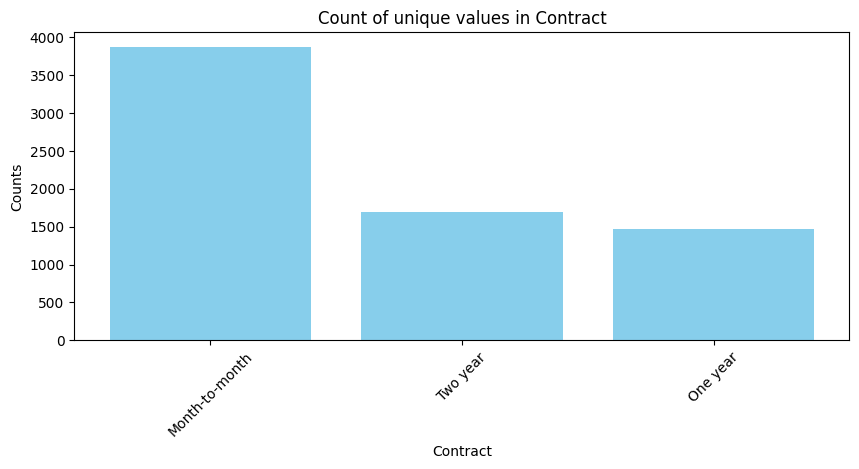

+----------------+-----+
|PaperlessBilling|count|
+----------------+-----+
|             Yes| 4171|
|              No| 2872|
+----------------+-----+



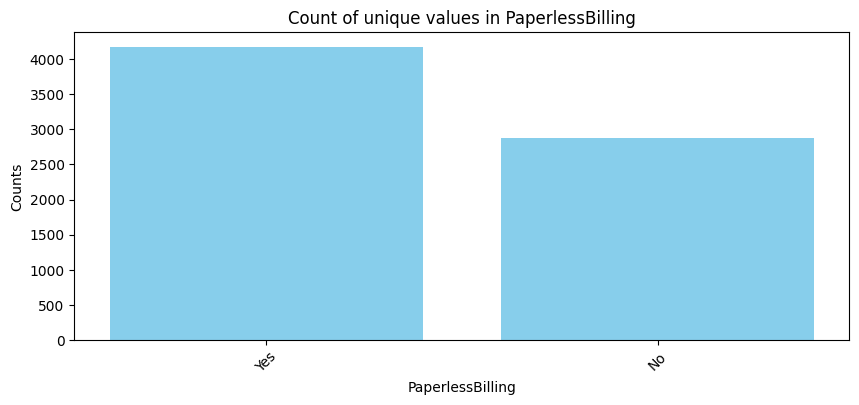

+--------------------+-----+
|       PaymentMethod|count|
+--------------------+-----+
|    Electronic check| 2365|
|        Mailed check| 1612|
|Bank transfer (au...| 1544|
|Credit card (auto...| 1522|
+--------------------+-----+



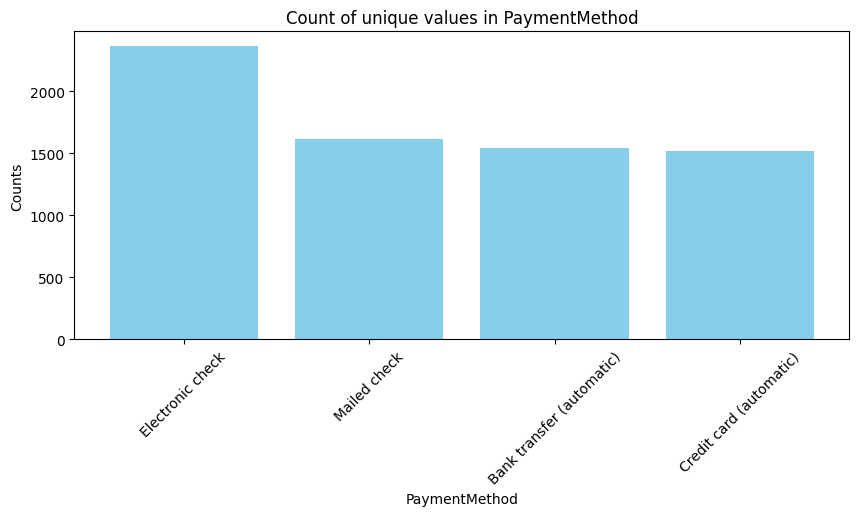

+--------------+-----+
|MonthlyCharges|count|
+--------------+-----+
|         20.05|   61|
|         19.85|   45|
|         19.95|   44|
|          19.9|   44|
|          19.7|   43|
|         19.65|   43|
|          20.0|   43|
|         19.55|   40|
|         20.15|   40|
|         19.75|   39|
+--------------+-----+



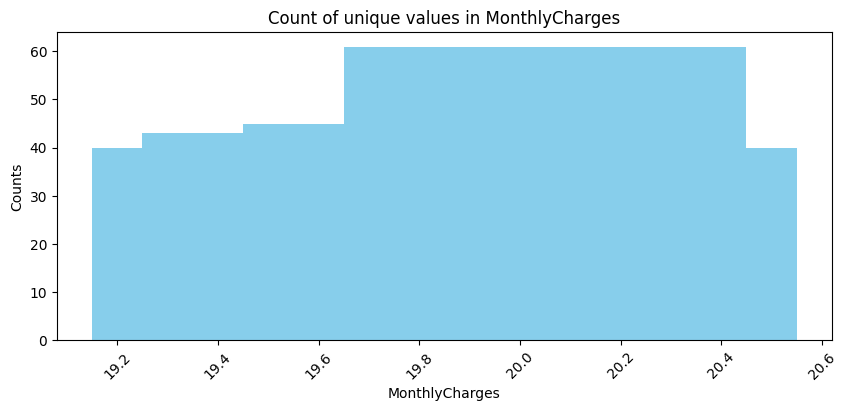

+------------+-----+
|TotalCharges|count|
+------------+-----+
|        20.2|   11|
|            |   11|
|       19.75|    9|
|        19.9|    8|
|       20.05|    8|
|       19.65|    8|
|       19.55|    7|
|        45.3|    7|
|       20.25|    6|
|       20.15|    6|
+------------+-----+



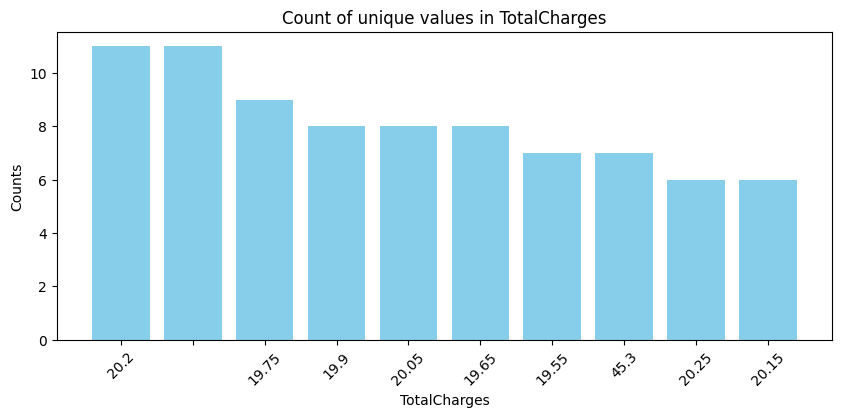

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
+-----+-----+



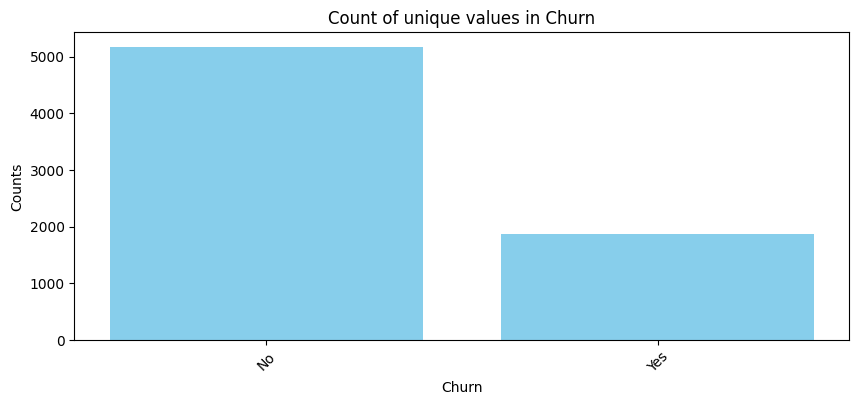

In [ ]:
#Counting Null values

import matplotlib.pyplot as plt

all_columns = [c for c in telecom_df.columns if c != 'customerID']

for column in all_columns:

    unique_counts = telecom_df.groupBy(column).count().orderBy('count', ascending=False).limit(10)
    unique_counts.show()


    pandas_df = unique_counts.toPandas()
    plt.figure(figsize=(10, 4))
    plt.bar(pandas_df[column], pandas_df['count'], color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Count of unique values in {column}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
#Converting Total charges to double
from pyspark.sql.functions import col,when
telecom_df = telecom_df.withColumn("TotalCharges", col("TotalCharges").cast("double"))


In [ ]:
unique_counts = telecom_df.groupBy("TotalCharges").count().orderBy('count', ascending=False).limit(10)
unique_counts.show()


+------------+-----+
|TotalCharges|count|
+------------+-----+
|        20.2|   11|
|        NULL|   11|
|       19.75|    9|
|        19.9|    8|
|       20.05|    8|
|       19.65|    8|
|        45.3|    7|
|       19.55|    7|
|       20.25|    6|
|       20.15|    6|
+------------+-----+



In [ ]:
from pyspark.sql.functions import when
# Convert "Churn" column to double type
telecom_df = telecom_df.withColumn("Churn", when(col("Churn") == "Yes", 1.0).otherwise(0.0))


In [ ]:
#Replacing Null value with mean Values
mean_value = telecom_df.agg(mean(col("TotalCharges"))).collect()[0][0]
telecom_df = telecom_df.na.fill({'TotalCharges': mean_value})
telecom_df.show()

+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|

In [ ]:
numerical_columns = [item[0] for item in telecom_df.dtypes if item[1] not in ('string', 'timestamp') and item[0] != 'Churn']
numerical_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
#Detecing outliners in numerical cloumn, calculating mean & SD & Z score has threshold value 3.
from pyspark.sql.functions import mean, stddev, col, abs
for column in numerical_columns:

    stats = telecom_df.select(mean(col(column)).alias('mean'), stddev(col(column)).alias('stddev')).collect()
    mean_val = stats[0]['mean']
    stddev_val = stats[0]['stddev']


    outliers = telecom_df.withColumn('z_score', (col(column) - mean_val) / stddev_val)
    outliers = outliers.filter((abs(col('z_score')) > 3))

    print(f"Outliers in column {column}:")
    outliers.show()

Outliers in column SeniorCitizen:
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-------+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|z_score|
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-------+
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----

+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|            features|
+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+
|Female|            0|    Yes| 

24/04/29 17:55:20 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
24/04/29 17:55:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/29 17:55:20 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


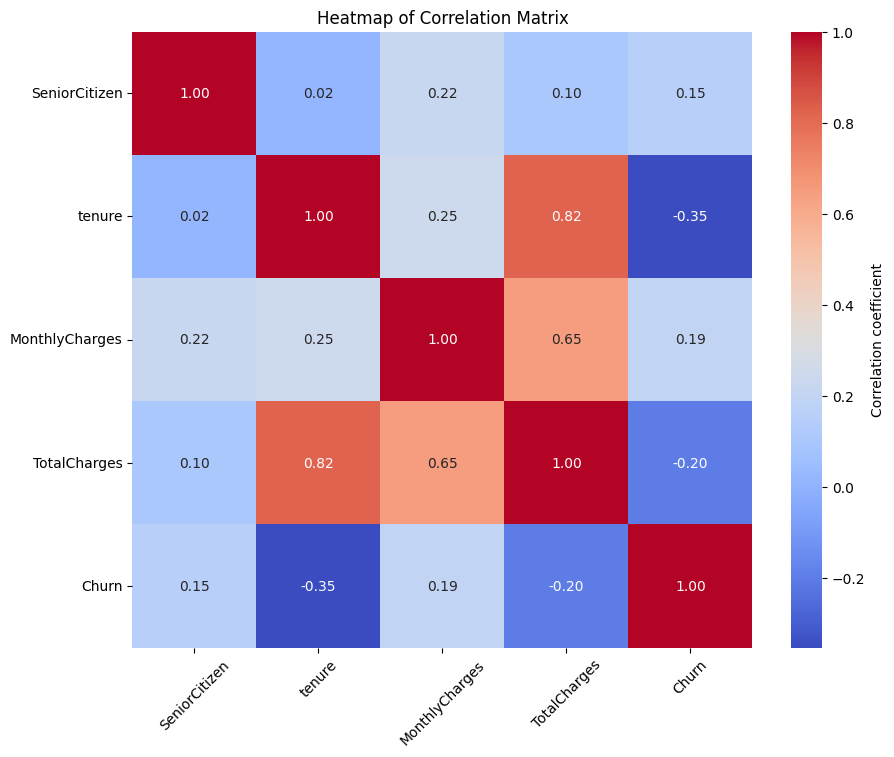

In [ ]:
# Calculating co relation matrix, assembling numerical features
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType, FloatType, DoubleType
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = [field.name for field in telecom_df.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
feature_vector_df = assembler.transform(telecom_df)

feature_vector_df.show()

correlation_matrix = Correlation.corr(feature_vector_df, "features", method="pearson").head()


correlation_array = correlation_matrix[0].toArray()
correlation_df = pd.DataFrame(correlation_array, index=numerical_columns, columns=numerical_columns)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from pyspark.sql.functions import col

# Create a new feature for customer engagement level based on usage patterns
telecom_df_prepared = telecom_df.withColumn(
    'EngagementScore',
    (col('tenure') * col('MonthlyCharges')) / col('TotalCharges')
)
telecom_df_prepared = telecom_df_prepared.withColumn(
    'HasInternetService',
    (col('InternetService') != 'No').cast('integer')
)

telecom_df_prepared = telecom_df_prepared.withColumn(
    'TenureTimesMonthlyCharges',
    col('tenure') * col('MonthlyCharges')
)

telecom_df = telecom_df_prepared.withColumn("ServiceScore",
    (when(col("OnlineSecurity") == "Yes", 1).otherwise(0) +
     when(col("OnlineBackup") == "Yes", 1).otherwise(0) +
     when(col("DeviceProtection") == "Yes", 1).otherwise(0)))

In [ ]:
'''
coleting all the string datatype columns
'''

categorical_columns = [item[0] for item in telecom_df.dtypes if item[1].startswith('string')]
print(categorical_columns)
print(telecom_df.columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'EngagementScore', 'HasInternetService', 'TenureTimesMonthlyCharges', 'ServiceScore']


In [ ]:
# identifying categorical clomuns & creating string indexer
categorical_columns = [item[0] for item in telecom_df.dtypes if item[1].startswith('string')]
indexers = [StringIndexer(inputCol=column, outputCol=column+"_indexed").setHandleInvalid("keep") for column in categorical_columns]


In [ ]:
#List of Feature colums
feature_columns = [c+"_indexed" for c in categorical_columns] + [c for c in telecom_df.columns if c not in categorical_columns + ['Churn']]


In [ ]:
feature_columns

['gender_indexed',
 'Partner_indexed',
 'Dependents_indexed',
 'PhoneService_indexed',
 'MultipleLines_indexed',
 'InternetService_indexed',
 'OnlineSecurity_indexed',
 'OnlineBackup_indexed',
 'DeviceProtection_indexed',
 'TechSupport_indexed',
 'StreamingTV_indexed',
 'StreamingMovies_indexed',
 'Contract_indexed',
 'PaperlessBilling_indexed',
 'PaymentMethod_indexed',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'EngagementScore',
 'HasInternetService',
 'TenureTimesMonthlyCharges',
 'ServiceScore']

In [ ]:
#Creating a vector assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")


In [ ]:
# Intilazing the random forest classifier
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
rf_classifier = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="Churn", numTrees=100)

In [ ]:
# #Creating a Pipeline
pipeline = Pipeline(stages=indexers + [assembler, scaler, rf_classifier])

In [ ]:
# Spliting the dataset 70 % % 30% , doing fine tuning
(trainingData, testData) = telecom_df.randomSplit([0.7, 0.3], seed=42)


paramGrid = (ParamGridBuilder()
              .addGrid(rf_classifier.maxDepth, [5, 10, 15])
              .addGrid(rf_classifier.numTrees, [50, 100, 150])
              .build())

evaluator = BinaryClassificationEvaluator(labelCol="Churn")

cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(trainingData)

best_pipeline_model = cvModel.bestModel

predictions = best_pipeline_model.transform(testData)

roc_auc = evaluator.evaluate(predictions)

print("ROC AUC Score:", roc_auc)


In [ ]:
roc_auc

0.8496313609242666

In [ ]:
predictions.show()

+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+---------------+------------------+-------------------------+------------+--------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+--------------------+--------------------+--------------------+--------------------+----------+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|Tot

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

# Selecting  the Churn and prediction columns from the predictions DataFrame
predictionAndTarget = predictions.select("Churn","prediction")

# Calculating  binary classification metrics and multiclass metrics
metrics_binary = BinaryClassificationMetrics(predictionAndTarget.rdd.map(tuple))
metrics_multi = MulticlassMetrics(predictionAndTarget.rdd.map(tuple))


#evaluating the metrics
acc = metrics_multi.accuracy
f1 = metrics_multi.fMeasure(1.0)
precision = metrics_multi.precision(1.0)
recall = metrics_multi.recall(1.0)
auc = metrics_binary.areaUnderROC

print(acc)
print(f1)
print(precision)
print(recall)
print(auc)

/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/lib/python3.9/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


0.796711509715994
0.5233644859813084
0.4171322160148976
0.7021943573667712
0.7583839085412055


In [ ]:
!pip install -U scikit-learn scipy matplotlib

  Using cached scikit_learn-1.4.2-cp39-cp39-macosx_10_9_x86_64.whl (11.6 MB)
  Using cached scipy-1.13.0-cp39-cp39-macosx_10_9_x86_64.whl (39.3 MB)
Requirement already up-to-date: matplotlib in ./venv/lib/python3.9/site-packages (3.8.4)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
You should consider upgrading via the '/Users/sthipp005/Documents/PERSONAL_ASSIGNMENTS/PERSONAL_PROJECTS/Praneeth_project/venv/bin/python3 -m pip install --upgrade pip' command.


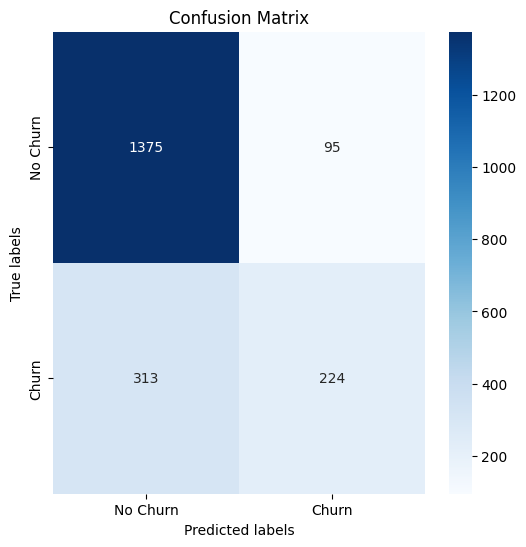

In [ ]:
# visualizing the Confusion Matrix
pred_labels = predictions.select('prediction').rdd.map(lambda row: row[0]).collect()
true_labels = predictions.select('Churn').rdd.map(lambda row: row[0]).collect()
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


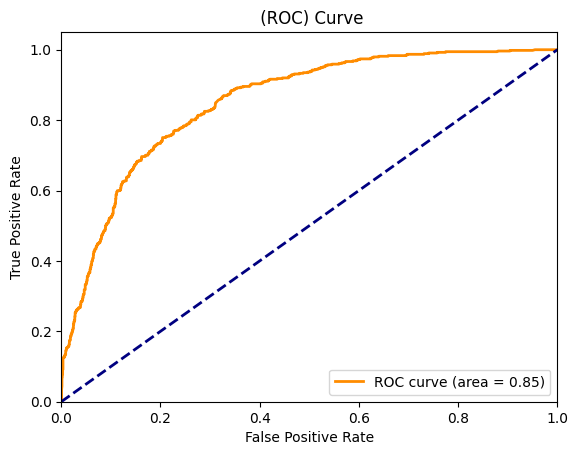

In [ ]:
#Roc Curve
from sklearn.metrics import roc_curve, auc
probs = predictions.select('Churn', 'probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['Churn'])))
true_labels = probs.map(lambda x: x[1]).collect()
predicted_probs = probs.map(lambda x: x[0]).collect()
fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Checking With Sample data
example_data = [
    (1, "Female", 0, "Yes", "No", 1, "No", "No phone service", "DSL", "No", "Yes", "No", "No", "No", "No", "Month-to-month", "Yes", "Electronic check", 29.85, 29.85),
    (2, "Male", 0, "No", "No", 34, "Yes", "No", "DSL", "Yes", "No", "Yes", "No", "No", "No", "One year", "No", "Mailed check", 56.95, 1889.5),
]


schema = ["customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService",
          "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
          "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
          "MonthlyCharges", "TotalCharges"]

# Create DataFrame from example data and schema
example_df = spark.createDataFrame(example_data, schema)

In [ ]:
example_df = example_df.withColumn('EngagementScore', (example_df['tenure'] * example_df['MonthlyCharges']) / example_df['TotalCharges'])
example_df = example_df.withColumn('HasInternetService', (example_df['InternetService'] != 'No').cast('integer'))
example_df = example_df.withColumn('TenureTimesMonthlyCharges', example_df['tenure'] * example_df['MonthlyCharges'])
example_df = example_df.withColumn("ServiceScore",
    (when(example_df["OnlineSecurity"] == "Yes", 1).otherwise(0) +
     when(example_df["OnlineBackup"] == "Yes", 1).otherwise(0) +
     when(example_df["DeviceProtection"] == "Yes", 1).otherwise(0)))

In [ ]:
predictionsValidations = best_pipeline_model.transform(example_df)

In [ ]:
predictionsValidations.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+------------------+------------------+-------------------------+------------+--------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+--------------------+--------------------+--------------------+--------------------+----------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|Monthly

In [ ]:
#saving the model
model_path = "pySparkModel"
best_pipeline_model.save(model_path)

In [ ]:
# importances = best_pipeline_model.featureImportances

rf_model = best_pipeline_model.stages[-1]  # assuming RF is the last stage in the pipeline

# Get the feature importances
importances = rf_model.featureImportances

# Collecting feature importances
importances_list = [(feature_columns[i], importances[i]) for i in range(len(importances))]
sorted_importances = sorted(importances_list, key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: tenure, Importance: 0.1913860056689252
Feature: Contract_indexed, Importance: 0.18888613157971662
Feature: InternetService_indexed, Importance: 0.11351986148779976
Feature: TechSupport_indexed, Importance: 0.10018337457151873
Feature: OnlineSecurity_indexed, Importance: 0.08320895511028584
Feature: TotalCharges, Importance: 0.06208517932973835
Feature: PaymentMethod_indexed, Importance: 0.0537249583712529
Feature: TenureTimesMonthlyCharges, Importance: 0.05271364137228718
Feature: MonthlyCharges, Importance: 0.05006926311617833
Feature: OnlineBackup_indexed, Importance: 0.02290311239450285
Feature: DeviceProtection_indexed, Importance: 0.02155969316158686
Feature: HasInternetService, Importance: 0.012071770006421722
Feature: StreamingTV_indexed, Importance: 0.009217920692212042
Feature: ServiceScore, Importance: 0.008408854726642342
Feature: EngagementScore, Importance: 0.007732089637783811
Feature: PaperlessBilling_indexed, Importance: 0.007647539836579442
Feature: StreamingM